In [3]:
import numpy as np
import sys
import os

np.set_printoptions(threshold=np.inf, linewidth=np.inf)

# Absolute path to the folder that contains "quant_rotor"
sys.path.append("/Users/gilfrim/Desktop/Projects/Computational_Analysis_of_Many_Rotor_Systems")

# Set print output parameters
np.set_printoptions(suppress = True, linewidth = np.inf, threshold = np.inf, precision = 12)


#working with kietic and potential operators

# Dense (Slow)
from quant_rotor.models.dense.support_ham import write_matrix_elements, basis_m_to_p_matrix_conversion

# Sparse (Fast)
from quant_rotor.models.sparse.support_ham import build_V_in_p

# Density Matrices

from quant_rotor.models.dense.density_matrix import density_matrix_1, density_matrix_2, dencity_energy

# ED hamiltonian implementation.

# Dense (Slow)
from quant_rotor.core.dense.hamiltonian import hamiltonian_dense
from quant_rotor.core.dense.hamiltonian_big import hamiltonian_general_dense

# Sparse (Fast)
from quant_rotor.core.sparse.hamiltonian import hamiltonian_sparse
from quant_rotor.core.sparse.hamiltonian_big import hamiltonian_general_sparse


# Iterative residual calculation

# Dense (Slow)
from quant_rotor.core.dense.t_amplitudes_guess import amplitute_energy, t_1_amplitude_guess_ground_state, t_2_amplitude_guess_ground_state
from quant_rotor.core.dense.t_amplitudes_periodic import t_periodic as t_periodic_dense
from quant_rotor.core.dense.t_amplitudes_non_periodic import t_non_periodic as t_non_periodic_dense

# Sparse (Fast)
from quant_rotor.core.dense.t_amplitudes_periodic_fast import t_periodic as t_periodic_sparse # for bigger systems (much harder to modify)


#Time dependant methods

# Dense (Slow)
from quant_rotor.core.dense.de_solve_one_thermal import integration_scheme

# Sparse (Fast)
from quant_rotor.core.dense.de_solve_one_thermal_dense import integration_scheme as integration_scheme_fast # for bigger systems (much harder to modify)

import time
import gc
import matplotlib.pyplot as plt

In [2]:
def time_once(fn, *args, **kwargs):
    """Time a single call to fn(*args, **kwargs)."""
    start = time.perf_counter()
    out = fn(*args, **kwargs)
    elapsed = time.perf_counter() - start
    return elapsed, out

def median_time(fn, *args, repeats=3, **kwargs):
    """Run fn multiple times, return median wall time (seconds)."""
    times = []
    for _ in range(repeats):
        gc.collect()
        t, _ = time_once(fn, *args, **kwargs)
        times.append(t)
    return float(np.median(times))

def bench_function_across_sites(builder_fn, sites_list, state, g, repeats=3, warmup=True):
    """Return list of times (seconds) for each sites in sites_list."""
    results = []
    for s in sites_list:
        if warmup:
            try:
                _ = builder_fn(state, s, g)
            except Exception:
                # If your builder returns (H, K, V), that’s fine; we don't use it here
                pass
        t = median_time(builder_fn, state, s, g, repeats=repeats)
        results.append(t)
        print(f"{builder_fn.__name__}: sites={s:>3}  time={t:.3f} s")
    return results

In [3]:
state = 3          # keep constant while sweeping sites
g = 1.0            # coupling to use in all runs
sites_list_d = np.arange(2, 11)
sites_list_d_2 = np.arange(2, 7)    # choose what you actually need
sites_list_s = np.arange(2, 15)
sites_list_s_2 = np.arange(2, 7)  # choose what you actually need
repeats = 1        # number of timings per point; median is reported
warmup = False

In [4]:
times_dense_3  = bench_function_across_sites(hamiltonian_dense,  sites_list_d, 3, g, repeats=repeats, warmup=warmup)

(9, 9)
hamiltonian_dense: sites=  2  time=0.001 s
(9, 9)
hamiltonian_dense: sites=  3  time=0.001 s
(9, 9)
hamiltonian_dense: sites=  4  time=0.001 s
(9, 9)
hamiltonian_dense: sites=  5  time=0.004 s
(9, 9)
hamiltonian_dense: sites=  6  time=0.014 s
(9, 9)
hamiltonian_dense: sites=  7  time=0.063 s
(9, 9)
hamiltonian_dense: sites=  8  time=0.353 s
(9, 9)
hamiltonian_dense: sites=  9  time=2.363 s
(9, 9)
hamiltonian_dense: sites= 10  time=25.601 s


In [ ]:
times_sparse_3 = bench_function_across_sites(hamiltonian_sparse, sites_list_s, 3, g, repeats=repeats, warmup=warmup)

hamiltonian_sparse: sites=  2  time=0.003 s
hamiltonian_sparse: sites=  3  time=0.001 s
hamiltonian_sparse: sites=  4  time=0.001 s
hamiltonian_sparse: sites=  5  time=0.004 s
hamiltonian_sparse: sites=  6  time=0.012 s


/Users/gilfrim/Desktop/Projects/Computational_Analysis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/scipy/sparse/_sputils.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(obj, dtype=dtype, copy=copy)


hamiltonian_sparse: sites=  7  time=0.042 s
hamiltonian_sparse: sites=  8  time=0.143 s
hamiltonian_sparse: sites=  9  time=0.475 s
hamiltonian_sparse: sites= 10  time=2.258 s
hamiltonian_sparse: sites= 11  time=5.231 s
hamiltonian_sparse: sites= 12  time=17.119 s
hamiltonian_sparse: sites= 13  time=55.459 s
hamiltonian_sparse: sites= 14  time=180.524 s


: 

In [ ]:
times_dense_5  = bench_function_across_sites(hamiltonian_dense,  sites_list_d_2, 11, g, repeats=repeats, warmup=warmup)

(121, 121)
hamiltonian_dense: sites=  2  time=0.020 s
(121, 121)
hamiltonian_dense: sites=  3  time=0.047 s
(121, 121)
hamiltonian_dense: sites=  4  time=1.441 s
(121, 121)


In [ ]:
times_sparse_5 = bench_function_across_sites(hamiltonian_sparse, sites_list_s_2, 11, g, repeats=repeats, warmup=warmup)

(9, 9)
hamiltonian_dense: sites=  2  time=0.001 s
(9, 9)
hamiltonian_dense: sites=  3  time=0.001 s
(9, 9)
hamiltonian_dense: sites=  4  time=0.001 s
(9, 9)
hamiltonian_dense: sites=  5  time=0.004 s
(9, 9)
hamiltonian_dense: sites=  6  time=0.013 s
(9, 9)
hamiltonian_dense: sites=  7  time=0.060 s
(9, 9)
hamiltonian_dense: sites=  8  time=0.333 s
(9, 9)
hamiltonian_dense: sites=  9  time=2.215 s
(9, 9)
hamiltonian_dense: sites= 10  time=24.056 s
hamiltonian_sparse: sites=  2  time=0.002 s
hamiltonian_sparse: sites=  3  time=0.001 s
hamiltonian_sparse: sites=  4  time=0.001 s
hamiltonian_sparse: sites=  5  time=0.004 s
hamiltonian_sparse: sites=  6  time=0.012 s
hamiltonian_sparse: sites=  7  time=0.041 s


/Users/gilfrim/Desktop/Projects/Computational_Analysis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/scipy/sparse/_sputils.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(obj, dtype=dtype, copy=copy)


hamiltonian_sparse: sites=  8  time=0.142 s
hamiltonian_sparse: sites=  9  time=0.474 s
hamiltonian_sparse: sites= 10  time=1.581 s
hamiltonian_sparse: sites= 11  time=5.244 s
hamiltonian_sparse: sites= 12  time=17.113 s
hamiltonian_sparse: sites= 13  time=55.520 s
hamiltonian_sparse: sites= 14  time=179.310 s
(121, 121)
hamiltonian_dense: sites=  2  time=0.019 s
(121, 121)
hamiltonian_dense: sites=  3  time=0.048 s
hamiltonian_sparse: sites=  2  time=0.003 s
hamiltonian_sparse: sites=  3  time=0.020 s
hamiltonian_sparse: sites=  4  time=0.281 s
hamiltonian_sparse: sites=  5  time=3.845 s
hamiltonian_sparse: sites=  6  time=49.933 s


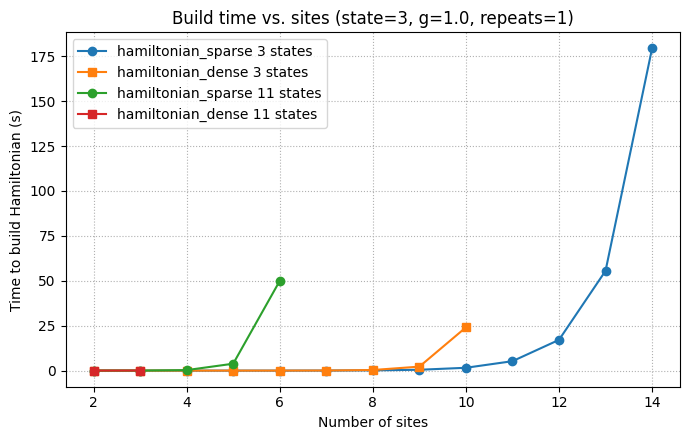

In [ ]:
plt.figure(figsize=(7,4.5))
plt.plot(sites_list_s, times_sparse_3, marker='o', label='hamiltonian_sparse 3 states')
plt.plot(sites_list_d, times_dense_3,  marker='s', label='hamiltonian_dense 3 states')
plt.plot(sites_list_s_2, times_sparse_5, marker='o', label='hamiltonian_sparse 11 states')
plt.plot(sites_list_d_2, times_dense_5,  marker='s', label='hamiltonian_dense 11 states')
plt.xlabel('Number of sites')
plt.ylabel('Time to build Hamiltonian (s)')
plt.title(f'Build time vs. sites (state={state}, g={g}, repeats={repeats})')
plt.grid(True, which='both', linestyle=':', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

In [4]:
def plot_memory_vs_sites(states, sites_list, *, bytes_per_value=8, bytes_per_nz=24,
                         sparse_formula="local", logy=True):
    """
    Plot memory M (GB) vs number of sites for fixed `states`.

    Parameters
    ----------
    states : int
        Local Hilbert-space size per site.
    sites_list : list[int]
        Sites to evaluate (e.g., range(2, 15)).
    bytes_per_value : int
        Bytes per scalar (8 for float64/complex128 real part; adjust if needed).
    bytes_per_nz : int
        Approximate bytes per nonzero in CSR/CSC (~24 bytes typical).
    sparse_formula : {"local", "screenshot"}
        - "local":  nnz ≈ (2*states - 2)^2 * states**(sites - 2)
                    (nearest-neighbour two-body on a chain; per-site local rule)
        - "screenshot": Msparse(states^sites) = 24*(2*sqrt(states^sites) - 2)^2 * states**(sites - 2) / 1024^3
                        (matches your slide formula literally)
    logy : bool
        Use log scale on y-axis.
    """
    sites_arr = np.array(list(sites_list), dtype=np.float64)

    # Dense memory (GB): 8*(N^2)/1024^3 with N = states**sites
    N = states ** sites_arr
    M_dense_GB = (bytes_per_value * (N**2)) / (1024**3)

    # Sparse memory (GB)
    if sparse_formula == "local":
        # nnz per row ~ (2*states-2)^2, number of blocks ~ states**(sites-2)
        nnz = ((2*states - 2)**2) * (states ** (sites_arr - 2))
        M_sparse_GB = (bytes_per_nz * nnz) / (1024**3)
    elif sparse_formula == "screenshot":
        # your slide’s expression (uses sqrt(N))
        M_sparse_GB = (24.0 * (2*np.sqrt(N) - 2.0)**2 * (states**(sites_arr - 2))) / (1024**3)
    else:
        raise ValueError("sparse_formula must be 'local' or 'screenshot'")

    # Plot
    plt.figure(figsize=(7,4.6))
    plt.plot(sites_arr, np.abs(M_dense_GB), marker='o', label='Dense')
    plt.plot(sites_arr, np.abs(M_sparse_GB), marker='s', label='Sparse')
    if logy:
        plt.yscale('log')
    plt.xlabel('Number of sites')
    plt.ylabel('log of Memory (GB)')
    plt.title(f'Memory vs. sites  (states = {states})')
    plt.grid(True, which='both', linestyle=':', linewidth=0.8)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return sites_arr, M_dense_GB, M_sparse_GB

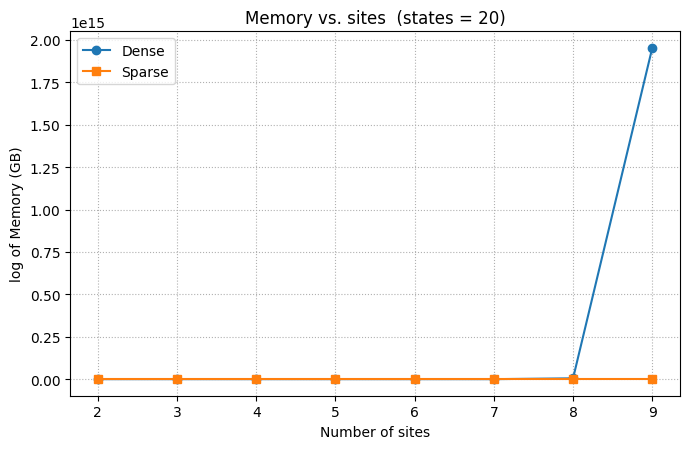

In [6]:
states = 20
sites = range(2, 10)  # 2..12
sites, dense, sparse = plot_memory_vs_sites(states, sites, sparse_formula="local", logy=False)        # nearest-neighbour local rule
# or to match your slide exactly:
# plot_memory_vs_sites(states, sites, sparse_formula="screenshot")

**!!!Before you start make sure to change the path in the first cell line 8 to the one from your computer!!!**

In [ ]:
np.log10(27894275208 / 1073741824)

np.float64(1.4146152114657564)

In [ ]:
np.e**3.2572718982436704

25.978568203747265

In [ ]:
N = 3 ** 10
M_dense_GB = (8 * (N**2)) / (1024**3)

In [ ]:
M_dense_GB

25.978568203747272

In [ ]:
nnz = ((2*3 - 2)**2) * (3 ** (10 - 2))
M_sparse_GB = (8 * nnz) / (1024**3)

In [ ]:
M_sparse_GB

0.0007821321487426758

In [ ]:
dense[10]

np.float64(2104.264024503529)

# Producing hamiltonian operators.

## Producing Kinetic and Potential operators.

In [ ]:
state = 3
g = 0.1
tau = 0

Example of the call to produce kinetic and potential matricies.

In [ ]:
# Recomended to produce small matrix which can be printed and see how it changes. For example 3 state system

Kinetic, Potential = write_matrix_elements((state-1)//2, tau) # takes input of the number of unique states see doc-string and annotation for more information

K, V = Kinetic, Potential

V_tensor = V.reshape(state, state, state, state)  # Adjust if needed

h_full = basis_m_to_p_matrix_conversion(K, state)
v_full = basis_m_to_p_matrix_conversion(V_tensor, state)

In [ ]:
h_full

array([[0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j]])

In [ ]:
v_full.reshape(state**2, state**2)

array([[ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.75+0.j, -0.25+0.j,  0.  +0.j, -0.25+0.j,  0.75+0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j,  0.75+0.j,  0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.  +0.j,  0.  +0.j,  0.75+0.j,  0.  +0.j,  0.  +0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j],
       [ 0.  +0.j, -0.25+0.j,  0.75+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [ 0.75+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [-0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [ 0.  +0.j,  0.75+0.j, -0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [-0.25+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j],
       [ 0.75+0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j,  0.  +0.j]])

In [ ]:
Kinetic_sparse, Potential_sparse = build_V_in_p(state, tau) # the fast version give a result in sparse which needs to ve converted to dense matricies

# Example of how to convert to dense.

Kinetic_dense = Kinetic_sparse.toarray()
Potential_dense = Potential_sparse.toarray()

/Users/gilfrim/Desktop/Projects/Computational_Analysis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/scipy/sparse/_sputils.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(obj, dtype=dtype, copy=copy)


In [ ]:
Kinetic_dense

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
Potential_dense

array([[ 0.  ,  0.  ,  0.  ,  0.  ,  0.75, -0.25,  0.  , -0.25,  0.75],
       [ 0.  ,  0.  ,  0.  , -0.25,  0.  ,  0.  ,  0.75,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.75,  0.  ,  0.  , -0.25,  0.  ,  0.  ],
       [ 0.  , -0.25,  0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.75, -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.75,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

Check the output.

In [ ]:
print(np.array_equal(h_full, Kinetic_dense))
print(np.allclose(v_full.reshape(state**2, state**2), Potential_dense), 1e-30)

True
True 1e-30


Produce several matricies for tests.

In [ ]:
save_dir = "example_data/kinetic_potential_matricies/ED"

for state in range(3, 15, 2):

    Kinetic_sparse, Potential_sparse = build_V_in_p(state, tau) # the fast version give a result in sparse which needs to ve converted to dense matricies

    # Example of how to convert to dense.

    Kinetic_dense = Kinetic_sparse.toarray()
    Potential_dense = Potential_sparse.toarray()

    save_path = os.path.join(save_dir, f"kin_pot_ED_state_{state}.npz")
    np.savez(save_path, K=Kinetic_dense, V=Potential_dense)

In [ ]:
save_dir = "example_data/kinetic_potential_matricies/ED"

for state in range(3, 15, 2):

    Kinetic_sparse, Potential_sparse = build_V_in_p(state, tau) # the fast version give a result in sparse which needs to ve converted to dense matricies

    # Example of how to convert to dense.

    Kinetic_dense = Kinetic_sparse.toarray()
    Potential_dense = Potential_sparse.toarray()

    save_path = os.path.join(save_dir, f"kin_pot_ED_state_{state}.npz")

    data = np.load(save_path)

    print(np.array_equal(Kinetic_dense, data["K"]))
    print(np.array_equal(Potential_dense, data["V"]))

True
True
True
True
True
True
True
True
True
True
True
True


## Producing Exact Diagonalization hamiltonians.

In [ ]:
site = 3
state = 5
g = 1

Exact Diagonalization hamiltonian dense (slow).

In [ ]:
H_ED_d, K_ED_d, V_ED_d = hamiltonian_dense(state, site, g)

eig_val_ED_d, eig_vec_ED_d = np.linalg.eigh(H_ED_d) # produces the solutions to the hamiltonian with energys and associated wavefunctions.

Exact Diagonalization hamiltonian sparse (fast).

In [ ]:
H_ED_s, K_ED_s, V_ED_s = hamiltonian_sparse(state, site, g)

H_ED_s = H_ED_s.toarray()
K_ED_s = K_ED_s.toarray()
V_ED_s = (V_ED_s.toarray())

eig_val_ED_s, eig_vec_ED_s = np.linalg.eigh(H_ED_s) # produces the solutions to the hamiltonian with energys and associated wavefunctions.

/Users/gilfrim/Desktop/Projects/Computational_Analysis_of_Many_Rotor_Systems/.venv/lib/python3.13/site-packages/scipy/sparse/_sputils.py:147: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(obj, dtype=dtype, copy=copy)


Check agains each other. (Should match)

In [ ]:
print("H_ED:", np.allclose(H_ED_d, H_ED_s))
print("K_ED:", np.allclose(K_ED_d, K_ED_s))
print("V_ED:", np.allclose(V_ED_d, V_ED_s))
print("eigen values:", np.allclose(eig_val_ED_d, eig_val_ED_s))
print("eigen vectors:", np.allclose(eig_vec_ED_d, eig_vec_ED_s))

H_ED: False
K_ED: True
V_ED: True
eigen values: False
eigen vectors: False


In [ ]:
H_ED_s - H_ED_d

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 

In [ ]:
H_ED_d

array([[0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j],
       ...,
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 4.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 4.+0.j]], shape=(125, 125))

## Density matrices

In [ ]:
site = 3
state = 11
g = 1

First for the density we extract a ground state vector.

In [ ]:
HKV = hamiltonian_dense(state, site, g)
H = HKV[0]

eig_val, eig_vec = np.linalg.eigh(H)

index = np.argmin(eig_val)
ground_state_vec = eig_vec[:, index]

Then we calculate densities for one site and two site interactions.

In [ ]:
D_1 = density_matrix_1(state, site, ground_state_vec, 0)
D_2 = density_matrix_2(state, site, ground_state_vec, 0, 1)

eig_val_D_1, eig_vec_D_1 = np.linalg.eigh(D_1)
eig_val_D_2, eig_vec_D_2 = np.linalg.eigh(D_2.reshape(state**2, state**2))

Two easy checks we can do to make sure the density matrices are correct are to sup up the eigenstates; they should roughly add up to one.

In [ ]:
print("Single density:", np.sum(eig_val_D_1))
print("Double density:", np.sum(eig_val_D_2))

The second check we can do is to we expect the two large identical eigenvalues for single and double interaction for the large g.

This makes physical sense since with large interaction strength (determined by g) the system roughly acts as polarized magnets aligning in one or the other
direction of the polarity. So our quantum system is in the superposition of those two alignments.

In [ ]:
-np.sort(-eig_val_D_1)
-np.sort(-eig_val_D_2)

Additional check that can be done as an exercise is to check whether the eigenvectors of D_1 and D_2 (separately) are orthogonal.

## Producing Natural Orbitas hamiltonians

Natural Orbitals hamiltonian dense (slow).

In [ ]:
H_NO_d, K_NO_d, V_NO_d = hamiltonian_general_dense(state, site, g)

eig_val_NO_d, eig_vec_NO_d = np.linalg.eigh(H_NO_d) # produces the solutions to the hamiltonian with energys and associated wavefunctions.

A way to check Natural Orbitals approximation with exact Diagonalization is to set the states = 11 and sites = 3.

The resulting Hamiltonians from ED and NO should have the same energy states (eigenvalues/eigenstates).

In [ ]:
np.allclose(eig_val_NO_d, eig_val_ED_s, atol=1e-19)

True

Natural Orbitals hamiltonian sparse (fast).

In [ ]:
H_NO_s, K_NO_s, V_NO_s = hamiltonian_general_sparse(state, site, g)

eig_val_NO_s, eig_vec_NO_s = np.linalg.eigh(H_NO_s) # produces the solutions to the hamiltonian with energys and associated wavefunctions.

Check the Natural Orbitals methods against each other.

In [ ]:
np.allclose(eig_val_NO_d, eig_val_NO_s, atol=1e-19)

True